In [8]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
dataset = load_diabetes()
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [3]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


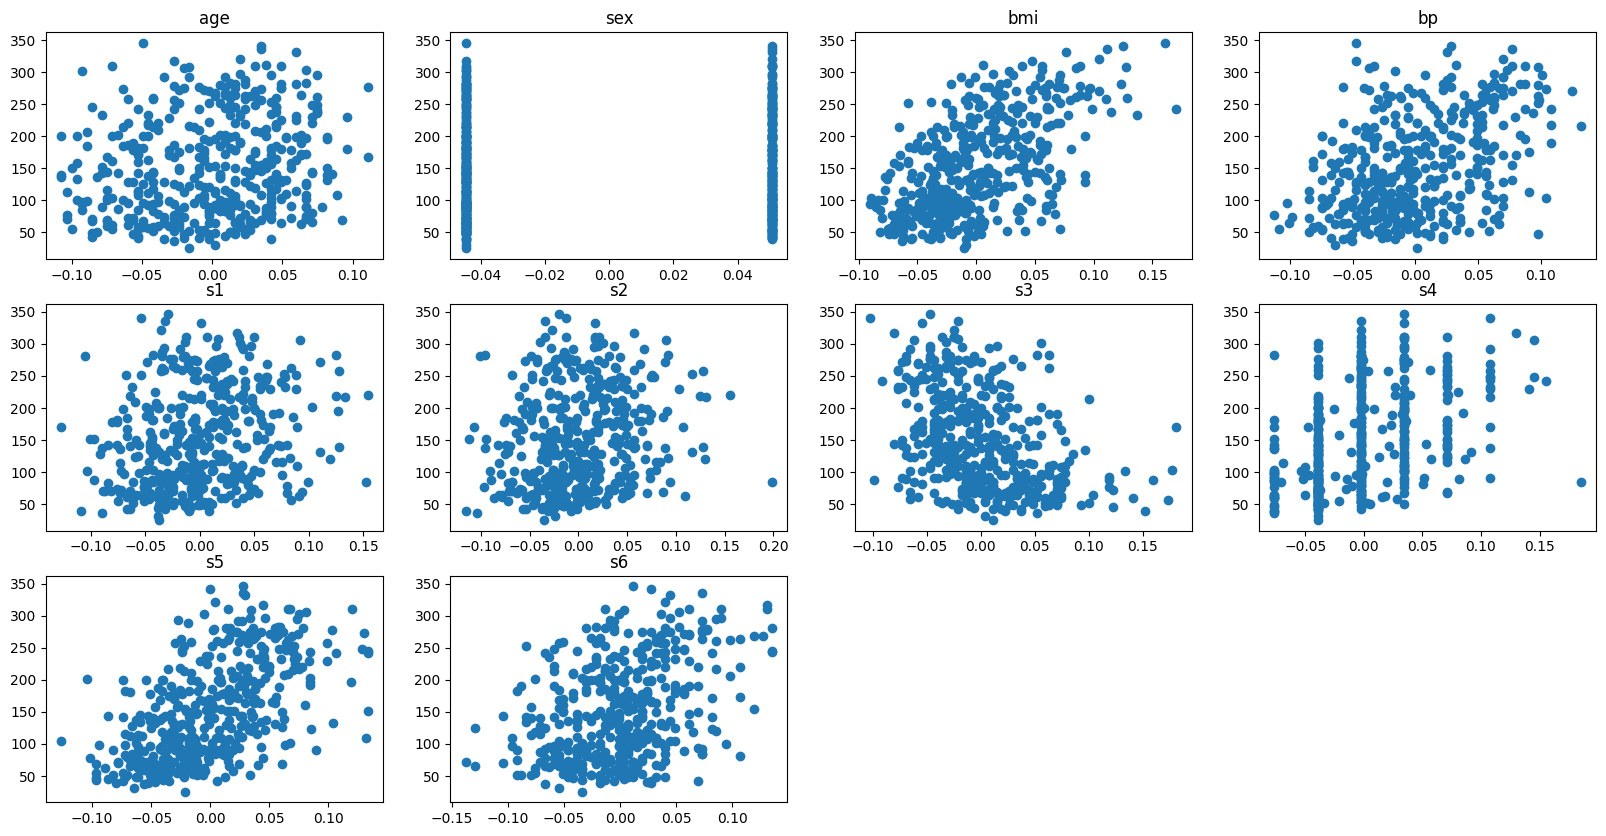

In [7]:
plt.figure(figsize=(20,10))
for i in range(10):
  plt.subplot(3,4,i+1)
  plt.scatter(df.iloc[:,i],df['target'])
  plt.title(df.columns[i])
plt.show()

In [9]:
model = nn.Sequential(
    nn.Linear(10, 64),
    nn.ReLU(),
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

X = torch.FloatTensor(df.iloc[:, :10].values)
Y = torch.FloatTensor(df['target'].values).reshape(-1, 1)

batch_size = 64
learning_rate = 1e-4
epochs = 30000

optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

for epoch in range(epochs):

  # 배치 설명
  for i in range(len(X) // batch_size):
    start = i*batch_size
    end = start + batch_size

    x = X[start:end]
    y = Y[start:end]

    optimizer.zero_grad()

    pred_y = model(x)

    loss = nn.MSELoss()(pred_y, y)
    loss.backward()
    optimizer.step()

  if epoch % 2000 == 0:
    print("epoch:", epoch, "loss:", loss.item())

epoch: 0 loss: 33426.09765625
epoch: 2000 loss: 3211.572509765625
epoch: 4000 loss: 2973.34375
epoch: 6000 loss: 2798.1328125
epoch: 8000 loss: 2380.986328125
epoch: 10000 loss: 2479.814208984375
epoch: 12000 loss: 1645.1651611328125
epoch: 14000 loss: 1392.1998291015625
epoch: 16000 loss: 1137.6356201171875
epoch: 18000 loss: 892.4213256835938
epoch: 20000 loss: 1043.5838623046875
epoch: 22000 loss: 726.3538818359375
epoch: 24000 loss: 567.1557006835938
epoch: 26000 loss: 423.78009033203125
epoch: 28000 loss: 331.08258056640625


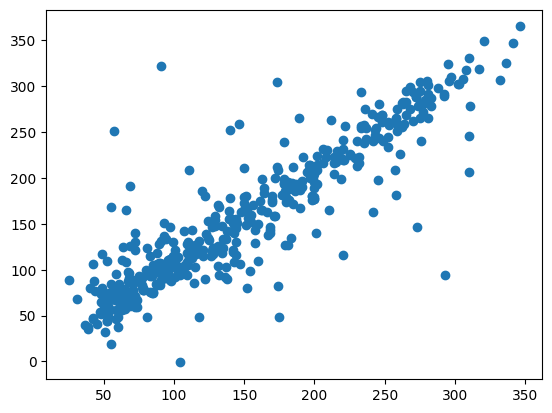

In [10]:
pred = model(torch.FloatTensor(X))
plt.scatter(Y.numpy(), pred.reshape(1, -1).clone().detach().numpy())

In [11]:
pred = model(torch.FloatTensor(X))

mae = (pred - Y).abs().mean()
rmse = ((pred - Y) ** 2).mean().sqrt()

print("MAE:", mae.item(), "RMSE:", rmse.item())

MAE: 21.535778045654297 RMSE: 34.82330322265625


MAE: 152.21080017089844 RMSE: 170.5815887451172


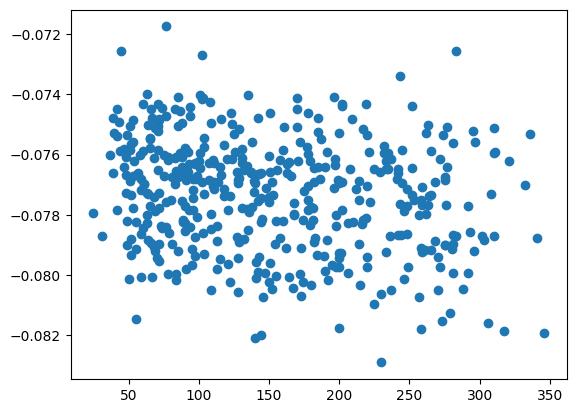

In [12]:
untrained_model = nn.Sequential(
    nn.Linear(10, 64),
    nn.ReLU(),
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

pred = untrained_model(torch.FloatTensor(X))
plt.scatter(Y.numpy(), pred.reshape(1, -1).clone().detach().numpy())

pred = untrained_model(torch.FloatTensor(X))

mae = (pred - Y).abs().mean()
rmse = ((pred - Y) ** 2).mean().sqrt()

print("MAE:", mae.item(), "RMSE:", rmse.item())